---
# Logistic Regression
---
## I. Input the Libary and Perpare the Data

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

In [105]:
df = pd.read_csv('D:/Study/UHD/6.Spring 2022/data 4319 final project/Major Project/1. Explore Data/df_workfile.csv')
# df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

,diagnosis,concave points_mean,concavity_mean,concave points_worst,compactness_mean,perimeter_worst,concavity_worst,radius_worst,perimeter_mean,area_worst,area_mean,fractal_dimension_mean
0,M,0.14710,0.3001,0.2654,0.27760,184.60,0.7119,25.38,122.80,2019.0,1001.0,0.07871
1,M,0.07017,0.0869,0.1860,0.07864,158.80,0.2416,24.99,132.90,1956.0,1326.0,0.05667
2,M,0.12790,0.1974,0.2430,0.15990,152.50,0.4504,23.57,130.00,1709.0,1203.0,0.05999
3,M,0.10520,0.2414,0.2575,0.28390,98.87,0.6869,14.91,77.58,567.7,386.1,0.09744
4,M,0.10430,0.1980,0.1625,0.13280,152.20,0.4000,22.54,135.10,1575.0,1297.0,0.05883


In [106]:
benign = df[df.diagnosis == 'B']
malignant = df[df.diagnosis == 'M']

Text(0.5, 1.0, 'Linearly Data')

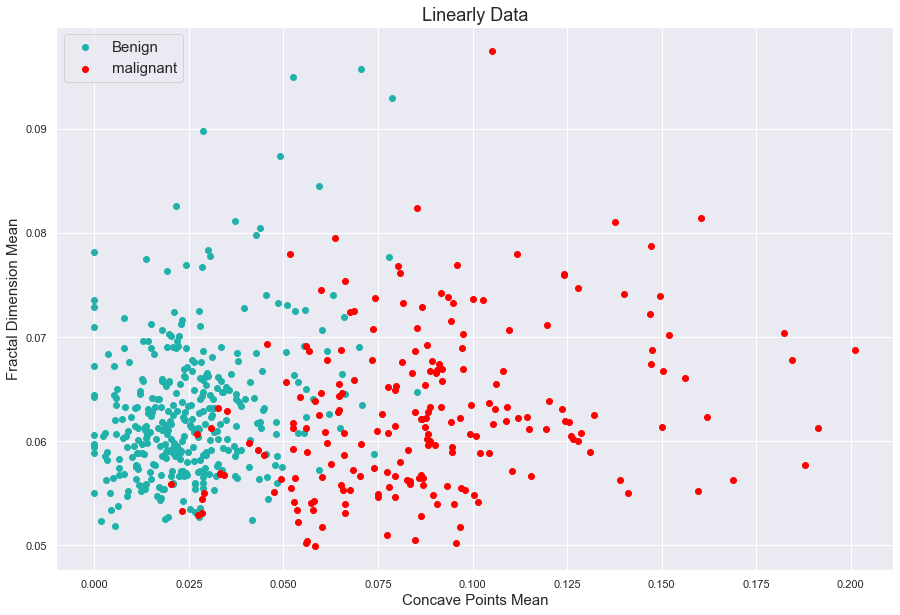

In [107]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15,10))

ax1.scatter(benign['concave points_mean'], 
            benign['fractal_dimension_mean'], 
            color = "lightseagreen", 
            label = "Benign")
ax1.scatter(malignant['concave points_mean'], 
            malignant['fractal_dimension_mean'], 
            color = "red", 
            label = "malignant")
ax1.set_xlabel("Concave Points Mean", fontsize = 15)
ax1.set_ylabel("Fractal Dimension Mean", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Data", fontsize = 18)

In [108]:
X = df['concave points_mean'].values
X = X.reshape(-1,1)
y = np.where(df.diagnosis == "B", 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


### II. Build a Machine Learning Logistic regression
1. Build the *SingleNeuron* model of the Logistic Regression to train dataset
   
   In this model include the training function, predicting function, and cost loss function (to check the accuracy of the model)

In [109]:
class SingleNeuron(object):
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()


2. In order to give instance the *SingleNeuron* model, we have to define the activation function which is *Logistic Regression* (Because Build glm SingleNeuron is the goal)

In [110]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

glm_model = SingleNeuron(sigmoid, cross_entropy_loss)
glm_model.train(X_train, y_train, alpha = 0.0001, epochs = 5000)

4. After training the model, we call the predict method to see how well the model work.

In [111]:
predictions = glm_model.predict(X_test.reshape(-1,1))

5. It is time to visualize the *Logistic Regression* Model and we can also visualize the loss/ error of each epoch we run in the model

* Logistic Regression is special since we can both visualize the hypothesis model and classification. First, Let's visualize the hypothesis model

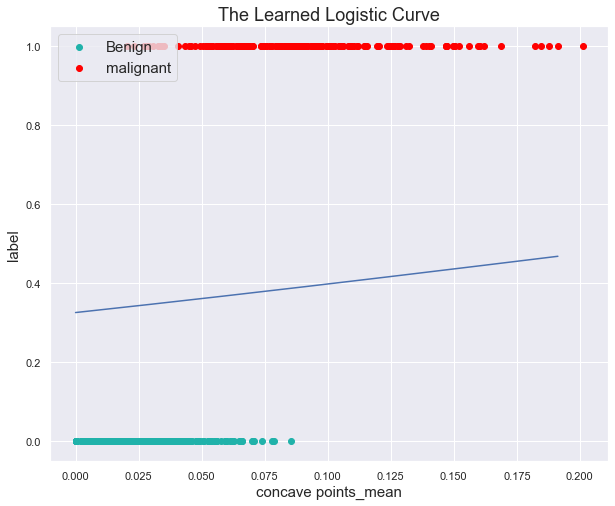

In [112]:
plt.figure(figsize = (10, 8))
plt.scatter(benign['concave points_mean'], 
            np.zeros(len(benign)), 
            color = "lightseagreen", 
            label = "Benign")
plt.scatter(malignant['concave points_mean'], 
            np.ones(len(malignant)), 
            color = "red", 
            label = "malignant")


plt.plot(sorted(X_test), glm_model.predict(sorted(X_test)))
plt.xlabel("concave points_mean", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

6. It is time to visualize the *Logistic Regression* Model and we can also visualize the loss/ error so we can see how Model improve everytime the model is execute in each epoch

In [113]:
classification_error = (np.rint(glm_model.predict(X_test)) != y_test).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y_test)}")

Classification Error = 0.40350877192982454


(-0.1, 0.12)

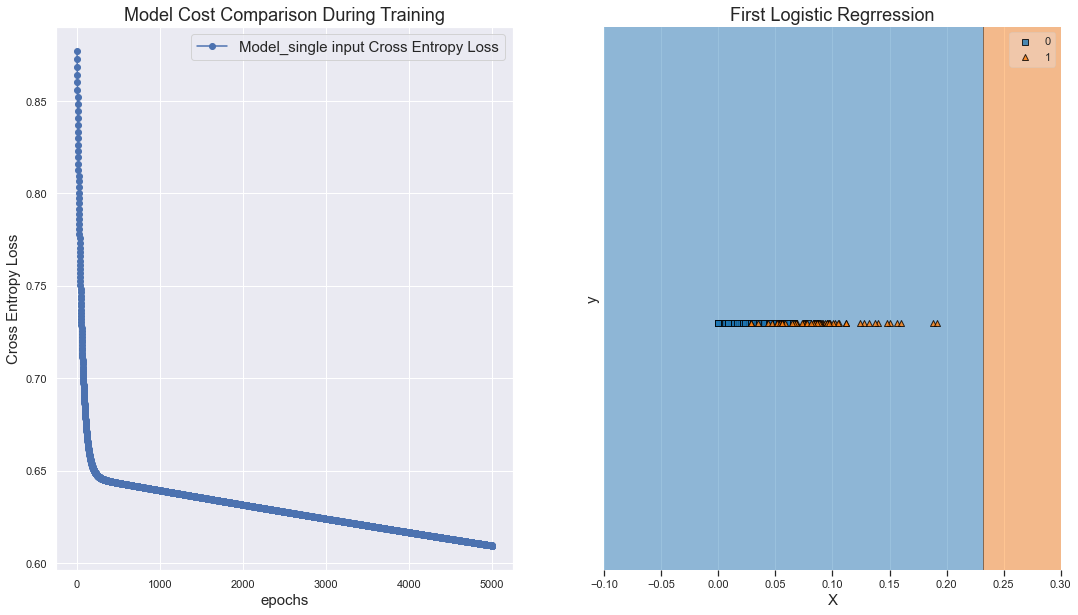

In [114]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(18,10))

ax1.plot(range(1, len(glm_model.errors_) + 1), 
         glm_model.errors_,
         label = "Model_single input Cross Entropy Loss",
         marker = "o")
ax1.set_xlabel("epochs", fontsize = 15)
ax1.set_ylabel("Cross Entropy Loss", fontsize = 15)
ax1.legend(fontsize = 15)
ax1.set_title("Model Cost Comparison During Training", fontsize = 18)

ax2 = plot_decision_regions(X_test, y_test, clf = glm_model)
ax2.set_title("First Logistic Regrression", fontsize = 18)
ax2.set_xlabel('X' , fontsize = 15)
ax2.set_ylabel("y", fontsize = 15)
ax2.set_xlim(-0.1, 0.3)
ax2.set_ylim(-0.1, 0.12)



## III. Logistic Single Neuron with multiple Features inputs

In [115]:
X = df[['concave points_mean', 'fractal_dimension_mean']].values
# X = df.drop('diagnosis', axis = 1).values
y = np.where(df.diagnosis == "B", 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [116]:
glm_model1 = SingleNeuron(sigmoid, cross_entropy_loss)

glm_model1.train(X_train, y_train, alpha = 0.01, epochs = 5000)


In [117]:
classification_error = (np.rint(glm_model1.predict(X_test)) != y_test).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y_test)}")

Classification Error = 0.08187134502923976


(0.0, 0.12)

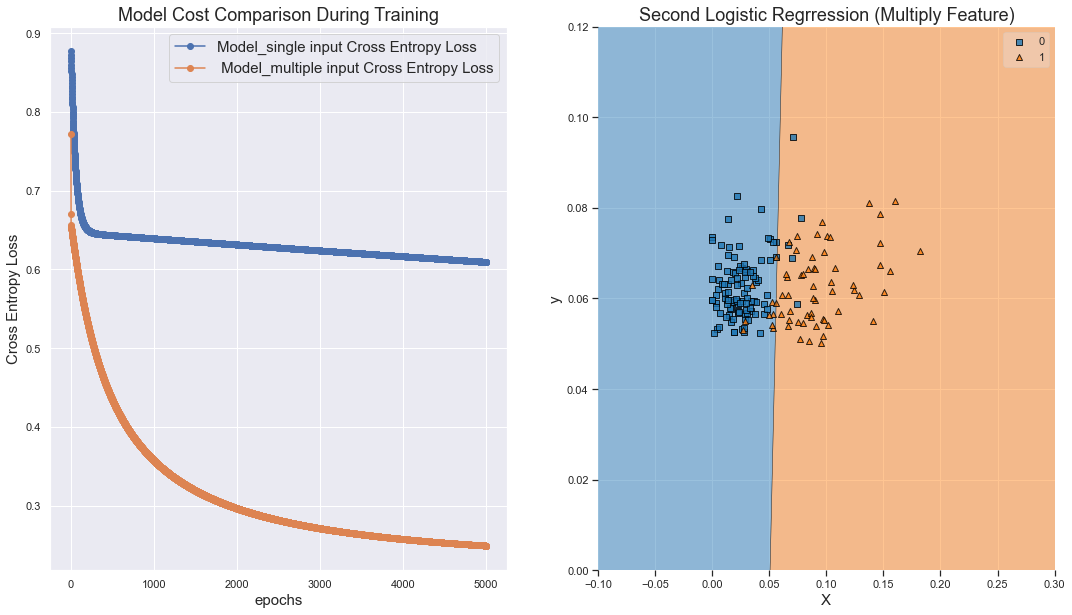

In [118]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(18,10))

ax1.plot(range(1, len(glm_model.errors_) + 1), 
         glm_model.errors_,
         label = "Model_single input Cross Entropy Loss",
         marker = "o")
ax1.plot(range(1, len(glm_model1.errors_) + 1), 
         glm_model1.errors_,
         label = " Model_multiple input Cross Entropy Loss",
         marker = "o")
ax1.set_xlabel("epochs", fontsize = 15)
ax1.set_ylabel("Cross Entropy Loss", fontsize = 15)
ax1.legend(fontsize = 15)
ax1.set_title("Model Cost Comparison During Training", fontsize = 18)

ax2 = plot_decision_regions(X_test, y_test, clf = glm_model1)
ax2.set_title("Second Logistic Regrression (Multiply Feature)", fontsize = 18)
ax2.set_xlabel('X' , fontsize = 15)
ax2.set_ylabel("y", fontsize = 15)
ax2.set_xlim(-0.1, 0.3)
ax2.set_ylim(0, 0.12)

---
## Logistic Single Neuron - Scikit Learn 

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [120]:
glm_model = LogisticRegression()
glm_model.fit(X_train, y_train)
predictions = glm_model.predict(X_test)

[[107   0]
 [ 61   3]]


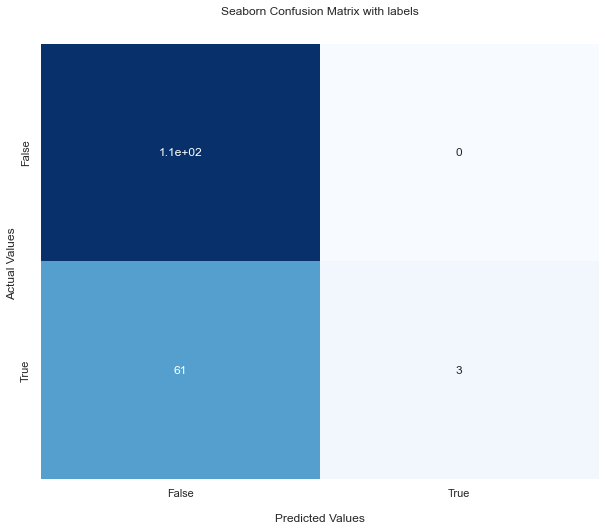

In [121]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [122]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       107
           1       1.00      0.05      0.09        64

    accuracy                           0.64       171
   macro avg       0.82      0.52      0.43       171
weighted avg       0.77      0.64      0.52       171



(0.0, 0.12)

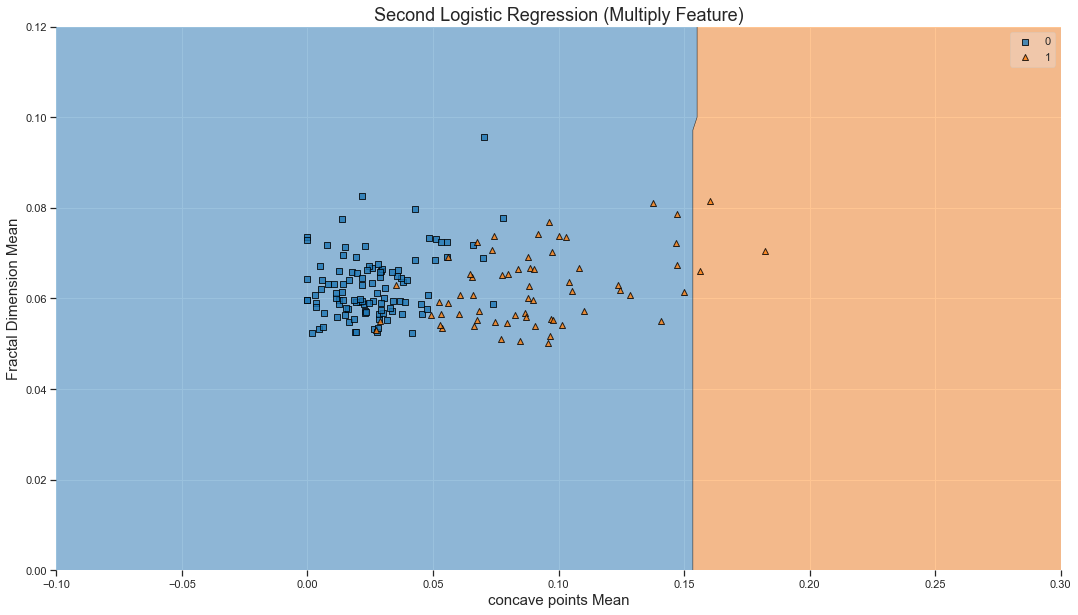

In [123]:
fig,(ax2) = plt.subplots(1, 1, figsize=(18,10))


ax2 = plot_decision_regions(X_test, y_test, clf = glm_model)
ax2.set_title("Second Logistic Regression (Multiply Feature)", fontsize = 18)
ax2.set_xlabel('concave points Mean' , fontsize = 15)
ax2.set_ylabel("Fractal Dimension Mean", fontsize = 15)
ax2.set_xlim(-0.1, 0.3)
ax2.set_ylim(0, 0.12)

Since the Model accuracy is not satisfied my expect, So now I will apply two kind of Boots to the model and see how improve is it

---
## Apply Ensemble Boosting Method


1. AdaBoost

In [124]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(LogisticRegression(), 
                             n_estimators = 100,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(X_train, y_train)
predictions = ada_clf.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       107
           1       0.00      0.00      0.00        64

    accuracy                           0.63       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.39      0.63      0.48       171



C:\Users\Thanh La\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thanh La\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thanh La\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1

[[107   0]
 [ 64   0]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

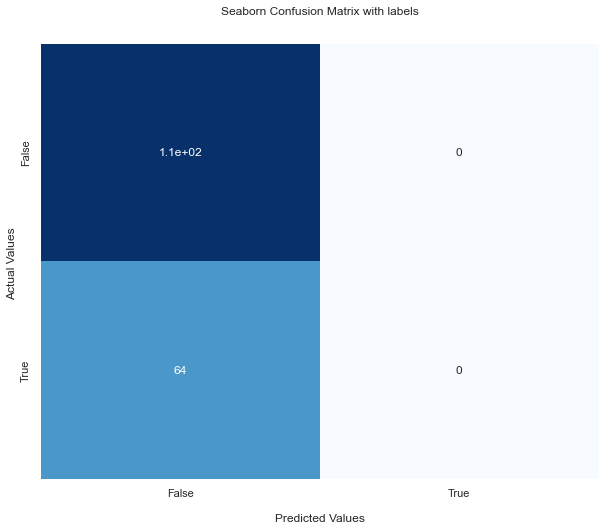

In [125]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

(0.0, 0.12)

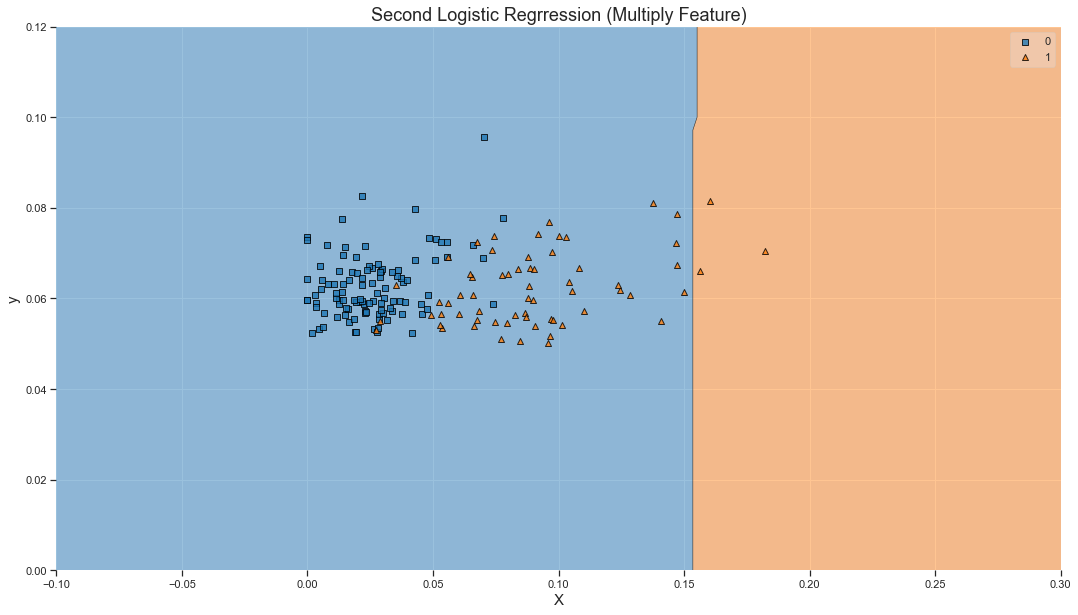

In [127]:
fig,(ax2) = plt.subplots(1, 1, figsize=(18,10))

ax2 = plot_decision_regions(X_test, y_test, clf = glm_model)
ax2.set_title("Second Logistic Regrression (Multiply Feature)", fontsize = 18)
ax2.set_xlabel('X' , fontsize = 15)
ax2.set_ylabel("y", fontsize = 15)
ax2.set_xlim(-0.1, 0.3)
ax2.set_ylim(0, 0.12)